In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [34]:
data_types = {"id": "object", "author_id": "object"}
df = pd.read_csv("./data_ana.csv", index_col=False, header=None,
                        names=['author_id', 'id', 'referenced_tweets', 'text', 'date', 'cleaned_text',
       'stopped_text', 'lem_text', 'scores', 'compound', 'comp_score',
       'gender', 'age', 'org'], dtype=data_types)

In [3]:
df = df.drop_duplicates(subset=["author_id"])

In [4]:
df = df[df["gender"].isna() == False]

In [5]:
df.shape

(1904, 14)

In [6]:
df['gender'].value_counts()

male      1125
female     779
Name: gender, dtype: int64

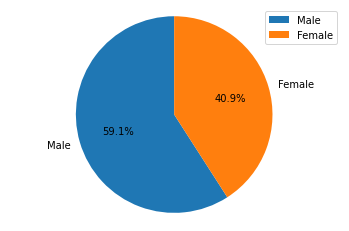

In [18]:
labels = 'Male', 'Female'
sizes = [1125, 779]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.legend(loc = "upper left")
plt.show()

In [6]:
df.groupby(['gender'])['compound'].mean()

gender
female    0.276253
male      0.291751
Name: compound, dtype: float64

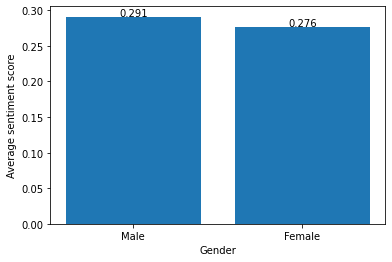

In [33]:
x = ['Male', 'Female']
y = [0.291, 0.276]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y)
plt.xlabel("Gender")
plt.ylabel("Average sentiment score")
plt.xticks(x_pos, x)

for index, value in enumerate(y):
    plt.text(index-0.080, value*1.005, str(format(value, '.3f')))

plt.show()

In [11]:
df = df[df["comp_score"].isna() == False]

In [12]:
df['comp_score'].value_counts()

positive    90918
neutral     37688
negative    34374
Name: comp_score, dtype: int64

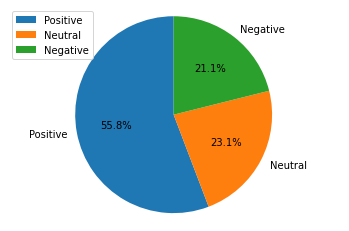

In [20]:
labels = 'Positive', 'Neutral', 'Negative'
sizes = [90918, 37688, 34374]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.legend(loc = "upper left")
plt.show()

In [7]:
df = df[df["age"].isna() == False]
df['age'].value_counts()

>=40     1102
30-39     424
19-29     268
<=18      110
Name: age, dtype: int64

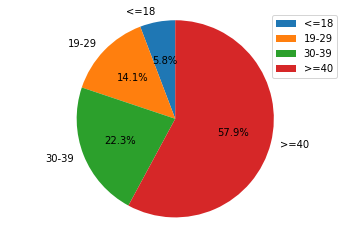

In [23]:
labels = '<=18', '19-29', '30-39', '>=40'
sizes = [110, 268, 424, 1102]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.legend(loc = "upper right")
plt.show()

In [8]:
df.groupby(['age'])['compound'].mean()

age
19-29    0.219599
30-39    0.265516
<=18     0.253097
>=40     0.312295
Name: compound, dtype: float64

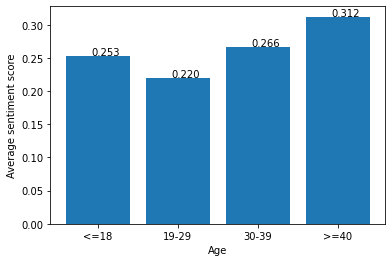

In [32]:
x = ['<=18', '19-29', '30-39', '>=40']
y = [0.253, 0.220, 0.266, 0.312]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y)
plt.xlabel("Age")
plt.ylabel("Average sentiment score")
plt.xticks(x_pos, x)

for index, value in enumerate(y):
    plt.text(index-0.08, value*1.005, str(format(value, '.3f')))

plt.show()

In [9]:
df = df[df["org"].isna() == False]
df['org'].value_counts()

non-org    1023
is-org      881
Name: org, dtype: int64

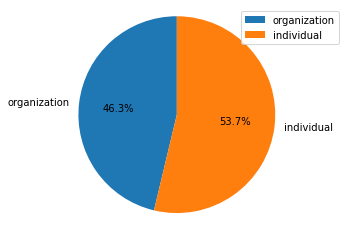

In [27]:
labels = 'organization', 'individual'
sizes = [881, 1023]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.legend(loc = "best")
plt.show()

In [10]:
df.groupby(['org'])['compound'].mean()

org
is-org     0.342559
non-org    0.236194
Name: compound, dtype: float64

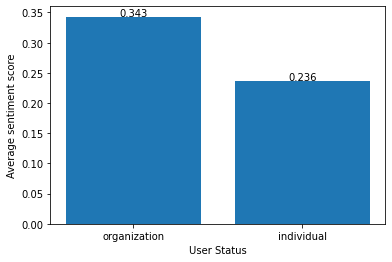

In [29]:
x = ['organization', 'individual']
y = [0.343, 0.236]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y)
plt.xlabel("User Status")
plt.ylabel("Average sentiment score")
plt.xticks(x_pos, x)

for index, value in enumerate(y):
    plt.text(index-0.08, value*1.005, str(format(value, '.3f')))

plt.show()

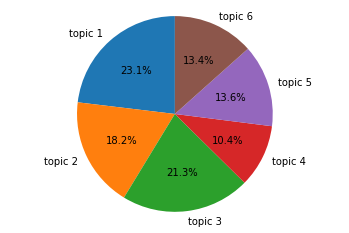

In [5]:
labels = 'topic 1', 'topic 2', 'topic 3', 'topic 4', 'topic 5', 'topic 6'
sizes = [23.1, 18.2, 21.3, 10.4, 13.6, 13.4]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
# plt.legend(loc = "upper left")
plt.show()

In [43]:
def topic(text):
    if "covid" in text or "pandemic" in text:
        return 1
    elif "zoom" in text or "class" in text:
        return 2
    elif "webinar" in text or "certificate" in text:
        return 3
    elif "mental" in text or "health" in text:
        return 4
    elif "support" in text or "help" in text:
        return 5
    elif "home" in text:
        return 6
    return 0

df["topic"] = df["text"].map(lambda x : topic(x))

In [45]:
df.groupby(['topic'])['compound'].mean()

topic
0    0.204944
1    0.136870
2    0.264569
3    0.359244
4    0.221529
5    0.573236
6    0.202920
Name: compound, dtype: float64

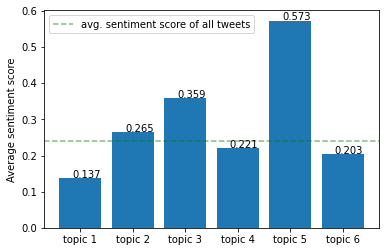

In [63]:
x = ['topic 1', 'topic 2', 'topic 3', 'topic 4', 'topic 5', 'topic 6']
y = [0.137, 0.265, 0.359, 0.221, 0.573, 0.203]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y)
plt.ylabel("Average sentiment score")
plt.xticks(x_pos, x)

for index, value in enumerate(y):
    plt.text(index-0.15, value*1.005, str(format(value, '.3f')))

plt.axhline(y = 0.239, color = 'g', alpha = 0.5, linestyle = '--', label = 'avg. sentiment score of all tweets')
plt.legend(loc = "upper left")
plt.show()

In [46]:
df['compound'].mean()

0.23891364045215535